# LAB 4 -  Laser operation

| Name | Surname | ID Number |
|------|---------|---------------------|
| Lorenzo | Calandra Buonaura | 2107761 |

**Import zone**

In [1]:
import pandas as pd
import laser_dynamics as ld

**Dataset loading**

In [2]:
# Load the dataset
file_path = './Data/2024-12-17.xlsx'
data = pd.read_excel(file_path, sheet_name='Foglio1')

current = data['Current [mA]'] / 1e3
voltage = data['Voltage [V]']
output_power = data['Power [uW]'] / 1e6

**LI curve and differential efficiency**

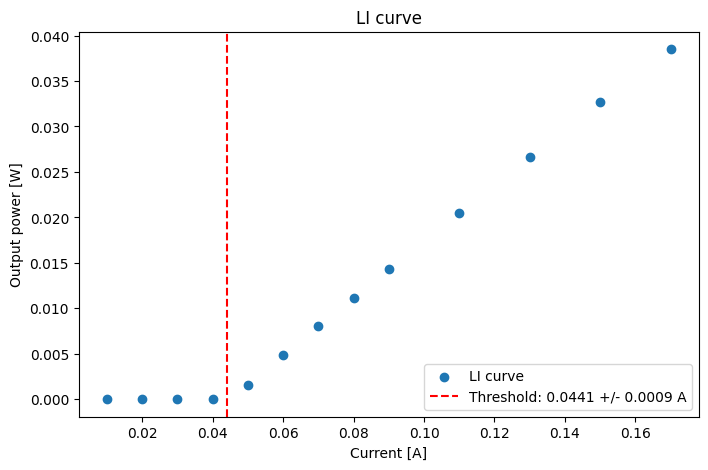

In [3]:
threshold_current, threshold_error = ld.calculate_threshold(current, output_power)
ld.plot_LI_curve(current, output_power, threshold_current, threshold_error)

Differential efficiency: 0.308 ± 0.002 mW/mA
Intercept: -1.36e-02 ± 1.90e-04 W


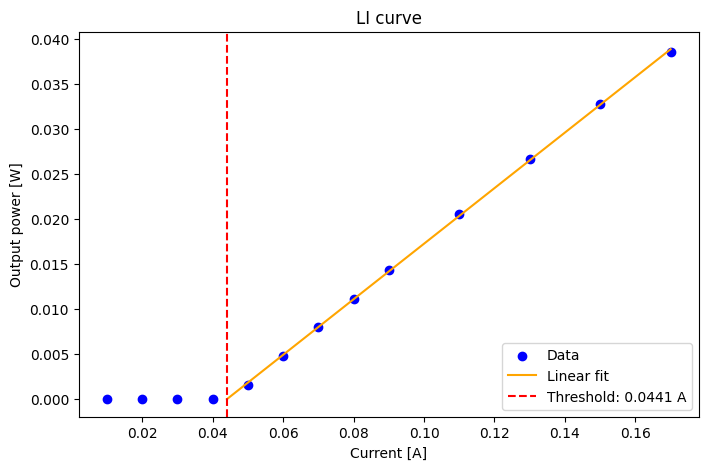

In [4]:
slope, intercept, slope_error, intercept_error = ld.fit_lasing_region(current, output_power, threshold_current)
print(f"Differential efficiency: {slope:.3f} ± {slope_error:.3f} mW/mA")
print(f"Intercept: {intercept:.2e} ± {intercept_error:.2e} W")

ld.plot_fitted_lasing_curve(current, output_power, threshold_current, slope, intercept)

**VI curve**

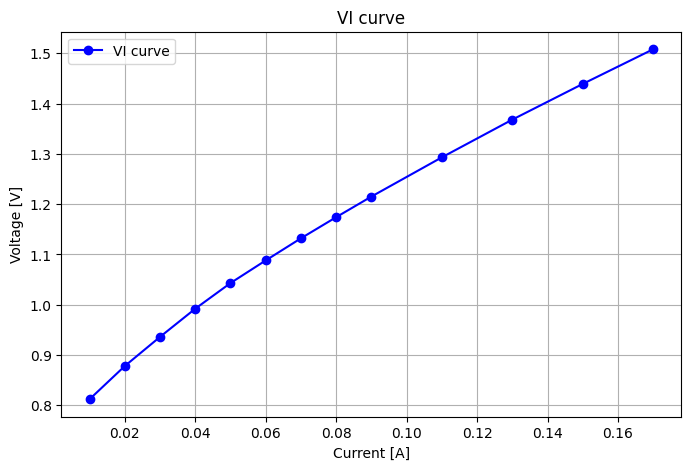

In [5]:
ld.plot_VI_curve(current, voltage)

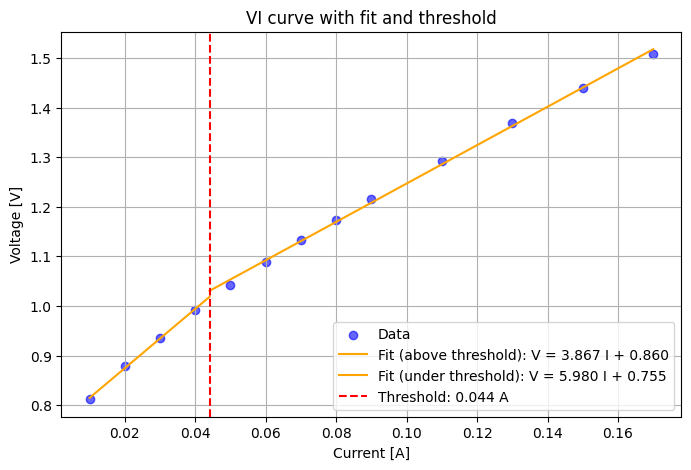

In [6]:
fit_1, fit_2 = ld.fit_VI_threshold(current, voltage, threshold_current)
ld.plot_fit_VI_threshold(current, voltage, threshold_current, fit_1, fit_2)

**WPE**

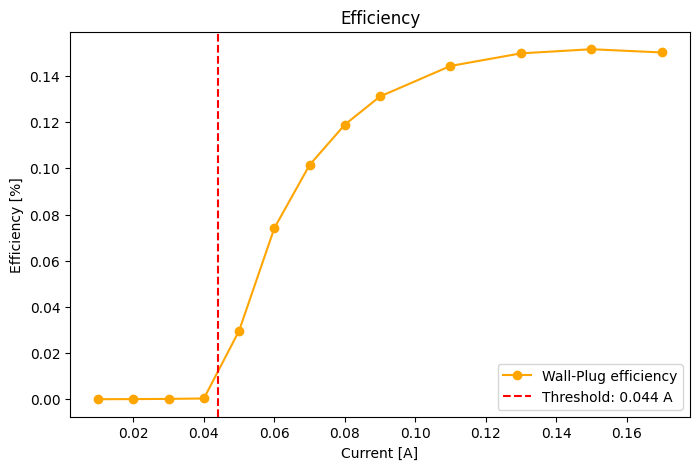

In [7]:
wpe = ld.wall_plug_efficiency(current, voltage, output_power)
ld.plot_wpe(current, threshold_current, wpe)

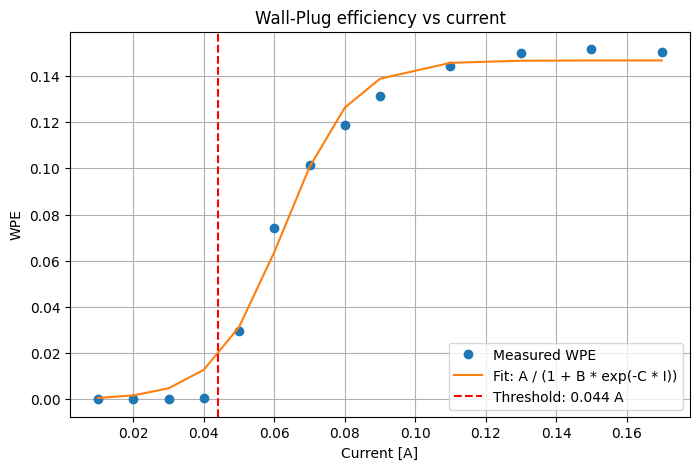

Fit parameters:
A = 0.147 +/- 0.003, B = 672.95 +/- 476.79, C = 104.17 +/- 11.56


In [8]:
ld.fit_wpe(current, threshold_current, wpe)